<a href="https://colab.research.google.com/github/thulasi-bikku/Classification/blob/main/Organic_Comparative_With_and_Without_Binning_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives:Here we have considered Organic Dataset and applied Random Forest using Binning (Divided entire dataset into 10 equal parts) and without Binning. Later We have splited dataset in 2 parts ( first part contains UV and Visible, second part contains IR ) and applied RF using binning and without binning approach.
-
-

### Getting Started:
- Colab notebooks consist of text cells (like this one) and program code cells, like the one shown below. Code cells are executed by typing the Cmd+Enter keys (or Ctrl-Enter). You can also execute a code cell by mousing over the [ ] symbol in the upper left hand side of the code cell---when you hover over it it will turn into a "play" button, and clicking the play button will execute the code cell. You can find other options for executing groups of cells in the "Runtime" menu above.

- Start by executing the code cell below (the one that begins with the line import pandas as pd). This loads ("imports") the required software modules that will be used in the assignment.
## Loading Python Libraries

In [ ]:
#load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Take a moment to look at this code block:
- import loads a module
- import ... as allows you to assign a short alias to the module
- from ... import loads a small portion of a module
- observe that the import, as and from keywords are color coded purple.
indicates a comment (observe that all of the text following the # is color coded green). This text is not interpreted by the computer, and its goal is to provide the human with some information about what is happening.<BR><BR>
What do each of these program modules do? You can think of them as being like a library of books that accomplish program tasks. In general, they can be quite complicated. In most cases, you will never learn all of the functionality of a module, and will have to use the documentation to help you determine the relevant parts for solving your problem. It is useful to have a general sense of the types of tasks that each of modules do, so that you can find the appropriate functionality.

- `pandas` is a library for handling datasets
- `numpy` and `scipy` are libraries for mathematical and scientific computing
- `matplotlib` and `plotly` are libraries for data visualization
- `sklearn` and `imblearn` are libraries for machine learning

Importing file:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ORGANIC.xlsx to ORGANIC.xlsx


In [ ]:
import io
df_full = pd.read_excel(io.BytesIO(uploaded['ORGANIC.xlsx']))
df_full.head()

,shelf,book,page,λ,n,k
0,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.196,0.6096
1,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.209,0.6501
2,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.228,0.7096
3,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.235,0.7315
4,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.1012,1.417,0.4472


In [ ]:
# Creating a copy in case we make any permanent changes and want to start from beginning.
df = df_full.copy()

In [ ]:
print(df.shape)
print(df.sample(frac=1).shape)
df.sample(frac=0.001).shape

(252130, 6)
(252130, 6)


(252, 6)

## Shuffling the dataset

In [ ]:
display(df.head())
df = df.sample(frac=1).reset_index(drop= True)
df.head()

,shelf,book,page,λ,n,k
0,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.196,0.6096
1,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.209,0.6501
2,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.228,0.7096
3,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.235,0.7315
4,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.1012,1.417,0.4472


,shelf,book,page,λ,n,k
0,organic,benzene,Myers,1.80910,1.47755,0.000027
1,organic,octane,Myers,3.05333,1.48364,0.000337
2,organic,propanol,Sani,2.63830,1.35407,0.000340
3,organic,benzene,Myers,1.29844,1.47780,0.000029
4,organic,styrene,Myers,1.56524,1.51612,0.000030


## Exploring the dataset

In [ ]:
print(df.shape)
df.head(3)

(252130, 6)


,shelf,book,page,λ,n,k
0,organic,benzene,Myers,1.80910,1.47755,0.000027
1,organic,octane,Myers,3.05333,1.48364,0.000337
2,organic,propanol,Sani,2.63830,1.35407,0.000340


In [ ]:
df.shape

(252130, 6)

In [ ]:
# Investigating all the elements within each feature
for column in df:
    unique_vals = np.unique(df[column].astype(str))
    nr_values = len(unique_vals)
    
    if nr_values < 36:
        print('The number of values for feature -  {} : {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, nr_values))

The number of values for feature -  shelf : 1 -- ['organic']
The number of values for feature book : 61
The number of values for feature page : 59
The number of values for feature λ : 54358
The number of values for feature n : 41463
The number of values for feature k : 195870


In [ ]:
# Dropping the column 'Shelf' and 'Page' as they are not relevent for the training and testing
# Renaming wavelength from 'λ' to 'wl' as lambda('λ') is harder to type.
df.drop(['shelf', 'page'], axis = 1, inplace= True)
df.rename(columns= {'λ': 'wl'}, inplace= True)

In [ ]:
df.sample()

,book,wl,n,k
230600,chloroform,0.913,NaN,4.417380e-08


In [ ]:
print("Number of null values in different columns")
collst = df.columns.tolist()
for col in collst:
    print('{}'.format(col).ljust(15),'{}'.format(df[col].isnull().sum()))

Number of null values in different columns
book            0
wl              1
n               6844
k               9891


In [ ]:
# Replacing NaN, k values with '0'
df['k'].fillna(0, inplace = True)

# dropping n values that are null 
df.dropna(axis=0, inplace=True)
df.shape

(245286, 4)

*Down* from '252130' number of rows to '245286'

In [ ]:
df.sample(2)

,book,wl,n,k
102561,propanol,19.0636,1.410290,0.027699
68738,polydimethylsiloxane,1.2325,1.404575,0.000000


In [ ]:
# Classfying the wavelengths to different catagories,based on the range of Wavelength
df['wl_binned'] = pd.cut(df['wl'], [0,0.4,0.75,1.5,4.0, np.inf], labels= ['UV', 'Visible', 'Near_IR', 'IR', 'Far_IR'])
df.sample(3)

,book,wl,n,k,wl_binned
168482,ethanol,9.67852,1.55318,0.074580,Far_IR
158550,Methanol,2.72299,1.27097,0.000939,IR
156685,ethanol,3.09783,1.38439,0.054658,IR


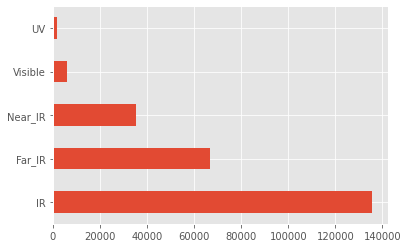

In [ ]:
# To check the number of wavelength of each category type
df.wl_binned.value_counts().plot(kind= 'barh')

## We can see a problem here:
- As UV and Visible light has very low numbers, Machine Learning Model will adverse effect on the training of this data.
- We need to split the dataset in two catagories. First containing "UV" and "Visible", Second containing: "IR", "near_IR", "Far_IR".

In [ ]:
df1 = df.query('wl_binned == "UV" or wl_binned == "Visible"')
df2 = df.query('wl_binned == "Far_IR" or wl_binned == "IR" or wl_binned == "Near_IR"')

In [ ]:
# you can see the difference in the size of the dataset and also the reason why we divide them, in the first place:
print("df1 :", df1.shape[0])
print("df2 :", df2.shape[0])

df1 : 7754
df2 : 237532


In [ ]:
# dividing these two into 2 different datasets.
# Organic_low for lower wavelength : UV and Visible
# Organic_high for highter wavelength : IR, Near_IR, Far_IR
df1.to_csv('Organic_low.csv')
df2.to_csv('Organic_high.csv')

# Df1
#### Working with the 7754 datepoint, containing wavelength in the range of UV and Visible light

In [ ]:
df1.shape

(7754, 5)

## Splitting the Raw Data
*Creating Input features (attributes) and Target Vectors for Training and testing the ML model.*

In [ ]:
x = df1.drop('book', axis=1) # Input features (attributes)
y = df1['book']   # Taget Vector

print('X shape: {}'.format(np.shape(x)))
print('Y shape: {}'.format(np.shape(y)))

X shape: (7754, 4)
Y shape: (7754,)


*`75%` data is for training and `25%` data is for testing.*

In [ ]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [ ]:
print('Length of x_test : {}\nLength of y_test : {}\nLength of x_train : {}\nLength of y_train : {}'.format(len(x_test),  len(y_test), len(x_train), len(y_train)))

Length of x_test : 1939
Length of y_test : 1939
Length of x_train : 5815
Length of y_train : 5815


### Random Forest Binning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
df1.sample()

,book,wl,n,k,wl_binned
26564,Cyclohexane,0.6281,1.40189,0.0,Visible


In [ ]:
numeric_features = ['wl','n','k']

In [ ]:
#preprocessing and training pipeline with binning

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler()),
                                      ('binning',KBinsDiscretizer(n_bins=10,encode='onehot')) #apply binning in 10 groups and one hot encode them
                                      ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features)   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [ ]:
rf_model = pipeline.fit(x_train, y_train)
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('binning',
                                                                   KBinsDiscretizer(n_bins=10))]),
                                                  ['wl', 'n', 'k'])])),
                ('regressor', RandomForestClassifier())])


In [ ]:
# You can check the training and testing accuracy down below of the df1 dataset
print(f'Training accuracy {rf_model.score(x_train,y_train)}')
print(f'Test accuracy {rf_model.score(x_test,y_test)}')

Training accuracy 0.5241616509028375
Test accuracy 0.515214027849407


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.48788035 0.48736462 0.49535604 0.50670795]
Mean: 0.4943272387807489


In [ ]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.49387492 0.48742747 0.49774339 0.49129594 0.51225806]
Mean: 0.496519955907739


In [ ]:
#predict function for RandomForestClassifier with binning

def predict(lambd,n,k,wl_binned):
  pred_df = pd.DataFrame({'wl':[lambd],
                         'n':[n],
                         'k':[k],
                          'wl_binned': [wl_binned]})
  pred = rf_model.predict(pred_df)
  return f'Book is {pred[0]}'

predict(0.7204,1.3559089944583,0,'UV')

'Book is ethanol'

Accuracy is low, let's see without binning
## Without Binning

In [ ]:
#preprocessing and training pipeline without binning

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler()),
                                      ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features)   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [ ]:
rf_model_wout_bin = pipeline.fit(x_train, y_train)
print (rf_model_wout_bin)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['wl', 'n', 'k'])])),
                ('regressor', RandomForestClassifier())])


In [ ]:
print(f'Training accuracy {rf_model_wout_bin.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_wout_bin.score(x_test,y_test)}')

Training accuracy 0.9967325881341359
Test accuracy 0.8390923156266117


In [ ]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model_wout_bin, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.82465188 0.83806086 0.8255934  0.84158927]
Mean: 0.8324738502659281


In [ ]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model_wout_bin, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.83043198 0.83881367 0.83043198 0.83301096 0.84322581]
Mean: 0.8351828788918698


In [ ]:
print(x.shape, y.shape)

(7754, 4) (7754,)


Accuracy has improved a lot

In [ ]:
#predict function for RandomForestClassifier without binning

def predict(lambd,n,k, wl_binned):
  pred_df = pd.DataFrame({'wl':[lambd],
                         'n':[n],
                         'k':[k],
                          'wl_binned': [wl_binned]})
  pred = rf_model_wout_bin.predict(pred_df)
  return f'Book is {pred[0]}'

predict(0.7204,1.3559089944583,0,"Visible")

'Book is acetone'

In [ ]:
# accuracies of individual wavelengths:
UV = x_test[x_test.wl_binned== 'UV']
UV_y = y_test[x_test.wl_binned== 'UV']
Visible = x_test[x_test.wl_binned== "Visible"]
Visible_y = y_test[x_test.wl_binned == "Visible"]

In [ ]:
labls = ['UV', 'Visible']
scores = []

for l in labls:
    test_x = x_test[x_test.wl_binned == l]
    test_y = y_test[x_test.wl_binned == l]

    scores.append(rf_model_wout_bin.score(test_x, test_y))

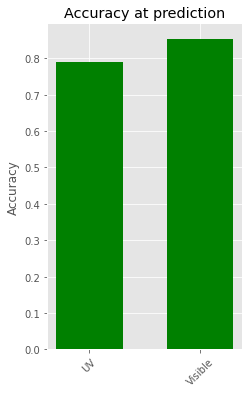

In [ ]:
plt.figure(figsize = (3.5,6))
plt.bar(labls,scores, color= "green", width = 0.6)

plt.title('Accuracy at prediction')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
scores

[0.7899543378995434, 0.8534310459693538]

In [ ]:
# Test instances
print(UV[10:12])
print('-'*90, end='\n\n')
print('Actual Class\n\n', UV_y[10:12])
print('-'*90, end='\n\n')
print('Predicted class\n\n', rf_model_wout_bin.predict(UV[10:12]))

              wl         n         k wl_binned
201358  0.339977  1.536536  0.004926        UV
93772   0.341900  1.387967  0.000000        UV
------------------------------------------------------------------------------------------

Actual Class

 201358    poly(N-isopropylacrylamide)
93772                         Heptane
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['poly(N-isopropylacrylamide)' 'Heptane']


In [ ]:
# Testing it with Visible
print(Visible[10:12])
print('-'*90, end='\n\n')
print('Actual Class\n\n', Visible_y[10:12])
print('-'*90, end='\n\n')
print('Predicted class\n\n', rf_model_wout_bin.predict(Visible[10:12]))

            wl         n    k wl_binned
16549   0.6327  1.490566  0.0   Visible
171453  0.5120  1.421230  0.0   Visible
------------------------------------------------------------------------------------------

Actual Class

 16549     poly(methyl_methacrylate)
171453         polydimethylsiloxane
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['poly(methyl_methacrylate)' 'polydimethylsiloxane']


In [ ]:
y_pred = rf_model_wout_bin.predict(x_test)
print(y_pred)

['pentane' 'dimethyl_sulfoxide' 'polydimethylsiloxane' ...
 'ethylene_glycol' 'poly(N-isopropylacrylamide)' 'methyl_salicylate']


### Precision, Recall, F1-Score of this model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

(C2ClF3)n - polychlorotrifluoroethylene       0.00      0.00      0.00         5
                              Acetylene       1.00      1.00      1.00        26
                            Cyclohexane       0.73      0.75      0.74       114
                          Ethyl acetate       0.23      0.21      0.22        28
                               Ethylene       1.00      1.00      1.00        32
                                Heptane       0.81      0.82      0.81        61
                                 Hexane       0.71      0.77      0.74       106
                               Methanol       0.90      0.84      0.87        56
                 Pentanol, amyl alcohol       1.00      0.62      0.76        13
                            acetic_acid       0.60      0.45      0.51        20
                                acetone       0.89      0.76      0.82        21
                           

**Both of our prediction came out correct**

---
#Df2
*(Repeating the whole process with the 2nd dataset)*<br>
Working with the 237532 datepoint, containing wavelength in the range of IR, Near_IR, Far_IR



In [ ]:
df2.shape

(237532, 5)

In [ ]:
df2.sample(2)

,book,wl,n,k,wl_binned
61177,octane,2.96000,1.46300,0.000253,IR
68399,styrene,1.54668,1.51614,0.000030,IR


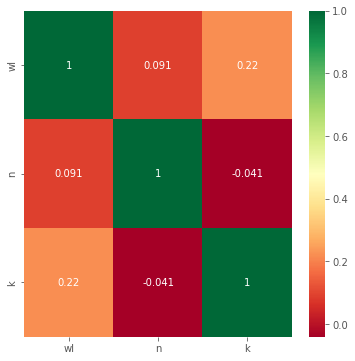

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
# get correlation of each feature in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (6,6))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap= "RdYlGn")

In [ ]:
 x = df2.drop('book', axis = 1)     # Input Features
 y = df2['book']                    # Target Vector

In [ ]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

- 25% of data is for testing.
- 75% of data is for training.

In [ ]:
# you can see the division :
print("x_train : {}, y_train : {}, x_test : {}, y_test : {} ".format(len(x_train), len(y_train), len(x_test), len(y_test)))

x_train : 178149, y_train : 178149, x_test : 59383, y_test : 59383 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_features = ['wl','n','k']

In [ ]:
#preprocessing and training pipeline with binning

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler()),
                                      ('binning',KBinsDiscretizer(n_bins=10,encode='onehot')) #apply binning in 10 groups and one hot encode them
                                      ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features)   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [ ]:
rf_model = pipeline.fit(x_train, y_train)
print(rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['wl', 'n', 'k'])])),
                ('regressor', RandomForestClassifier())])


In [ ]:
print(f'Training accuracy {rf_model.score(x_train,y_train)}')
print(f'Test accuracy {rf_model.score(x_test,y_test)}')

Training accuracy 0.9577937569113495
Test accuracy 0.8883518852196757


In [ ]:

#predict function for RandomForestClassifier with binning

def predict(lambd,n,k,binned):
  pred_df = pd.DataFrame({'wl':[lambd],
                         'n':[n],
                         'k':[k],
                          'wl_binned': [binned]})
  pred = rf_model.predict(pred_df)
  return f'Book is {pred[0]}'

predict(0.7204,1.3559089944583,0,"IR")

'Book is ethanol'

Since the accuracy is low : Let's try without binning
## Without Binning

In [ ]:

#preprocessing and training pipeline without binning

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler()),
                                      ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features)   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [ ]:
rf_model_wout_bin = pipeline.fit(x_train, y_train)
print (rf_model_wout_bin)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['wl', 'n', 'k'])])),
                ('regressor', RandomForestClassifier())])


In [ ]:
# Let's see if the accuracy has improved : 
print(f'Training accuracy {rf_model_wout_bin.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_wout_bin.score(x_test,y_test)}')

Training accuracy 0.9577937569113495
Test accuracy 0.8881834868565077


## Cross Validation
Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test the model on this sample before finalizing the model.



In [ ]:
from sklearn.model_selection import cross_val_score
cvfour = cross_val_score(rf_model_wout_bin, x, y, cv = 4, scoring = 'accuracy')
print(cvfour)
print('Mean: ', cvfour.mean())

[0.88980011 0.88963171 0.88749305 0.88934544]
Mean:  0.8890675782631392


In [ ]:
cvfive = cross_val_score(rf_model_wout_bin, x, y, cv = 5, scoring = 'accuracy')
print(cvfive)
print('Mean: ', cvfive.mean())

[0.8879323  0.88862694 0.88717215 0.8860986  0.8872774 ]
Mean:  0.887421477037663


### Accuracy has improved a lot.

In [ ]:
# Accuracy of individual wavelength:
labls = ["Near_IR", "IR", "Far_IR"]
tr_scores = []

for l in labls:
    train_x = x_train[x_train.wl_binned == l]
    train_y = y_train[x_train.wl_binned == l]

    tr_scores.append(rf_model_wout_bin.score(train_x, train_y))

In [ ]:
for i in range(len(labls)):
    print(labls[i],":", tr_scores[i])

Near_IR : 1.0
IR : 0.9268398225823901
Far_IR : 0.9983971469215203


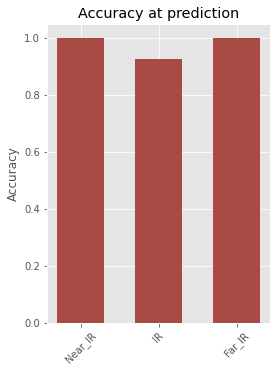

In [ ]:
plt.figure(figsize = (4,5.5))
plt.bar(labls,tr_scores, color= "#AA4A44", width = 0.6)

plt.title('Accuracy at prediction')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#predict function for RandomForestClassifier without binning

def predict(lambd,n,k, wl_binned):
  pred_df = pd.DataFrame({'wl':[lambd],
                         'n':[n],
                         'k':[k],
                          'wl_binned': [wl_binned]})
  pred = rf_model_wout_bin.predict(pred_df)
  return f'Book is {pred[0]}'

predict(0.7204,1.3559089944583,0, "IR")

'Book is ethanol'

In [ ]:
y_pred = rf_model_wout_bin.predict(x_test)

In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes = None, title = 'Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws= {'size':50})
    else:
        sns.heatmap(cm,vmin=0, vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = rf_model_wout_bin.predict(x_test)
print(y_pred)

['nitrobenzene' 'Methanol' 'styrene' ... 'dimethyl_methylphosphonate'
 'Methanol' 'propanol']


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    7,    0, ...,    0,    0,    0],
       [   0,    0, 3481, ...,    0,    0,    0],
       ...,
       [   0,    0,    1, ..., 3730,    4,    0],
       [   0,    0,    0, ...,    5, 3384,    0],
       [   0,    0,    0, ...,    0,    0,    8]])

Precision, Recall and F1-score for different 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

 (C6H12)n - polymethylpentene       0.00      0.00      0.00         6
                  Cyclohexane       1.00      1.00      1.00         7
                     Methanol       0.89      0.91      0.90      3838
       Pentanol, amyl alcohol       0.98      1.00      0.99        49
                  acetic_acid       1.00      1.00      1.00         4
                      acetone       1.00      1.00      1.00         2
                 acetonitrile       1.00      1.00      1.00      3837
                      benzene       0.90      0.91      0.91      3785
                    bromoform       0.93      0.93      0.93        29
                      butanol       1.00      1.00      1.00        34
         carbon_tetrachloride       0.93      0.97      0.95        59
                    cellulose       1.00      0.93      0.96        14
                   chloroform       1.00      1.00      1.00        19
     

## Understanding Target

In [ ]:
df.sample()

,book,wl,n,k,wl_binned
214280,toluene,4.28096,1.47427,0.000671,Far_IR


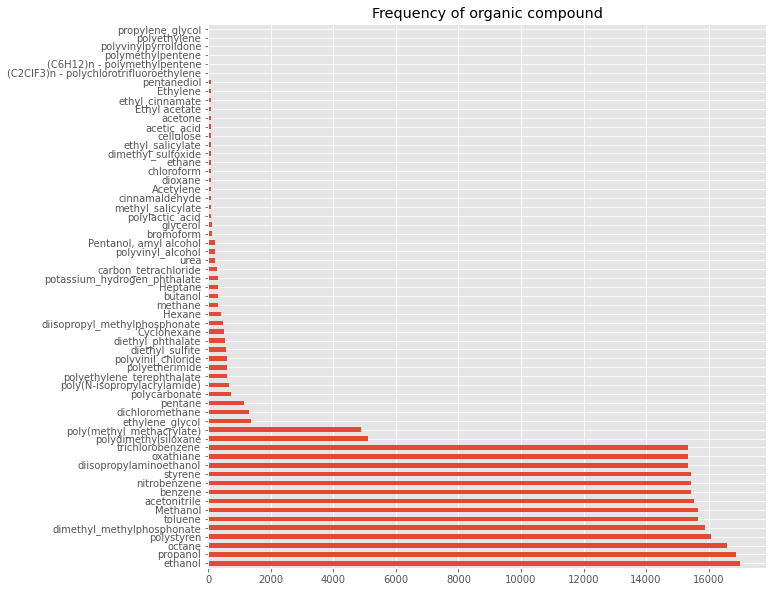

In [ ]:
df.book.value_counts().plot(kind='barh', figsize=(10,10), title = "Frequency of organic compound");


In [ ]:
print("All the organic compounds and there frequencies.")
dict(df.book.value_counts())

All the organic compounds and there frequencies.


{'(C2ClF3)n - polychlorotrifluoroethylene': 31,
 '(C6H12)n - polymethylpentene': 30,
 'Acetylene': 101,
 'Cyclohexane': 505,
 'Ethyl acetate': 101,
 'Ethylene': 101,
 'Heptane': 303,
 'Hexane': 404,
 'Methanol': 15648,
 'Pentanol, amyl alcohol': 202,
 'acetic_acid': 101,
 'acetone': 101,
 'acetonitrile': 15547,
 'benzene': 15446,
 'bromoform': 136,
 'butanol': 303,
 'carbon_tetrachloride': 280,
 'cellulose': 101,
 'chloroform': 101,
 'cinnamaldehyde': 101,
 'dichloromethane': 1305,
 'diethyl_phthalate': 552,
 'diethyl_sulfite': 570,
 'diisopropyl_methylphosphonate': 468,
 'diisopropylaminoethanol': 15345,
 'dimethyl_methylphosphonate': 15898,
 'dimethyl_sulfoxide': 101,
 'dioxane': 101,
 'ethane': 101,
 'ethanol': 16992,
 'ethyl_cinnamate': 101,
 'ethyl_salicylate': 101,
 'ethylene_glycol': 1363,
 'glycerol': 125,
 'methane': 318,
 'methyl_salicylate': 101,
 'nitrobenzene': 15446,
 'octane': 16576,
 'oxathiane': 15345,
 'pentane': 1133,
 'pentanediol': 101,
 'poly(N-isopropylacrylamide

### Average Index Value

## Before Shuffling


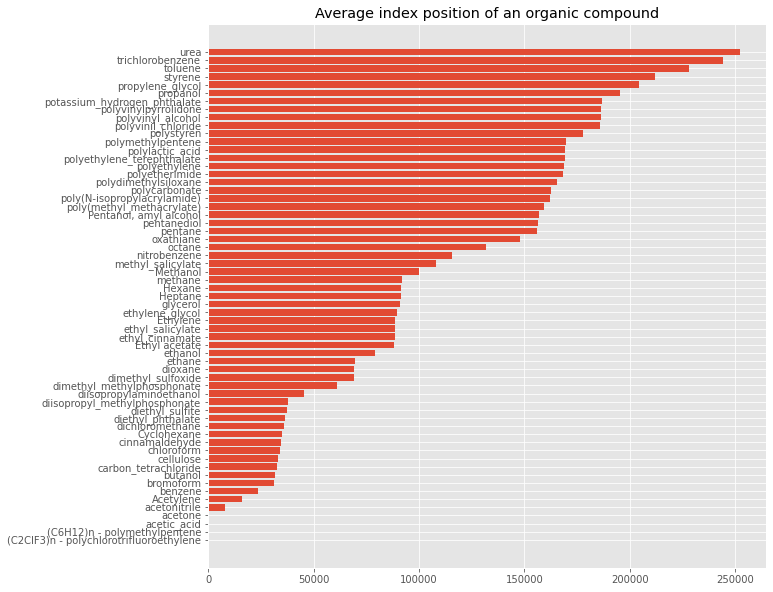

In [ ]:
uniorg = df_full.book.unique()
#uniorg = list(set(uniorg))
#print(len(uniorg))
idxdict = {}
for org in uniorg:
    idxavg = df_full.query('book == @org').index.tolist()
    idxavg = np.array(idxavg)
    #print(org.ljust(50), idxavg.mean())
    idxdict[org] = idxavg.mean()

organic_compounds = list(idxdict.keys())
idxvalues = list(idxdict.values())
f, ax = plt.subplots(figsize=(10,10))
plt.barh(range(len(idxdict)), idxvalues, tick_label = organic_compounds);
plt.title('Average index position of an organic compound');

## After Shuffling

In [ ]:
uniorg = df.book.unique()
#uniorg = list(set(uniorg))
print(len(uniorg))
idxdict = {}
for org in uniorg:
    idxavg = df.query('book == @org').index.tolist()
    idxavg = np.array(idxavg)
    print(org.ljust(50), idxavg.mean())
    idxdict[org] = idxavg.mean()

61
benzene                                            125766.55574258708
octane                                             125924.08409749034
propanol                                           126015.98040144473
styrene                                            125967.31956493591
poly(methyl_methacrylate)                          125905.86405577199
toluene                                            125818.70098415134
Methanol                                           125899.95207055214
nitrobenzene                                       126773.89317622686
dichloromethane                                    125028.3754789272
acetonitrile                                       125940.86158101242
oxathiane                                          126427.33522319974
ethanol                                            126881.55690913371
trichlorobenzene                                   125997.11717171717
polystyren                                         125454.45906742202
polycarbonate     

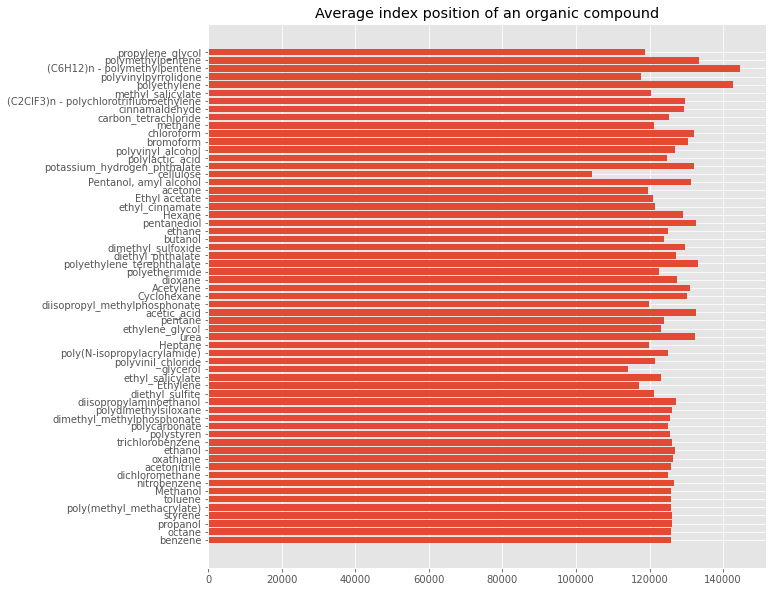

In [ ]:
organic_compounds = list(idxdict.keys())
idxvalues = list(idxdict.values())
f, ax = plt.subplots(figsize=(10,10))
plt.barh(range(len(idxdict)), idxvalues, tick_label = organic_compounds);
plt.title('Average index position of an organic compound');

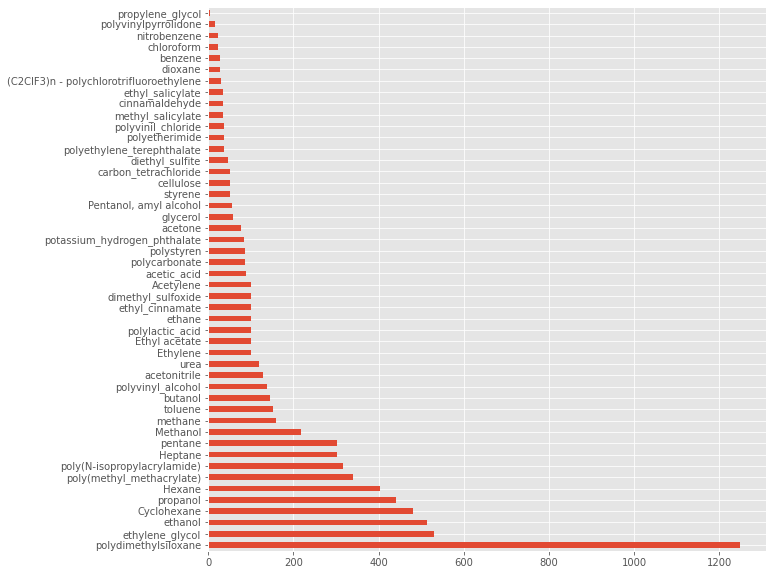

In [ ]:
df1.book.value_counts().plot(kind='barh', figsize=(10,10));

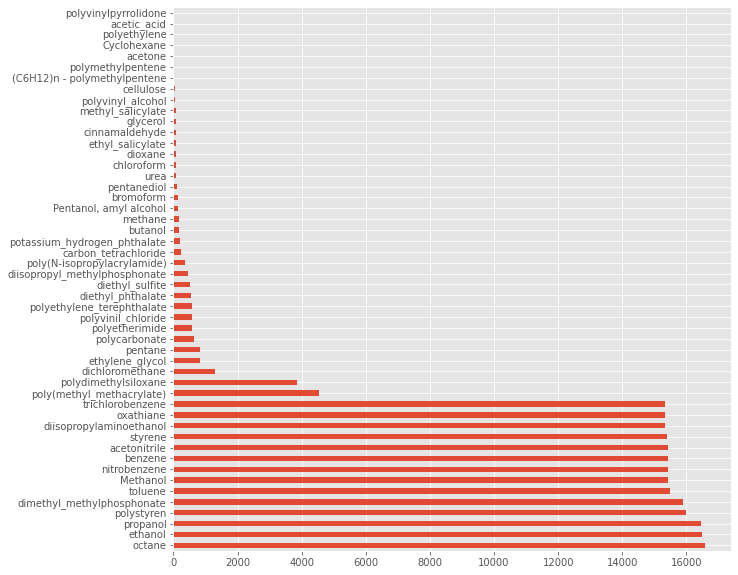

In [ ]:
df2.book.value_counts().plot(kind='barh', figsize=(10,10));

### RandomSearchCV

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
from datetime import datetime
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' %(thour, tmin, round(tsec, 3)))

In [ ]:
classifier = xgboost.XGBClassifier()

In [ ]:
## Hyper parameter Optimization
params = {
    "learning_rate"     : [0.05, 0.10, 0.15, 0.20, 0.30] ,
    "max_depth"         : [3,4, 5, 6, 8, 10, 12, 15],
    "min_child_weight"  : [1,3, 5, 7],
    "gamma"             : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree"  : [0.3, 0.4, 0.5, 0.7]
}

In [ ]:
random_search = RandomizedSearchCV(classifier, param_distributions= params, n_iter=5, scoring= 'roc_auc', n_jobs=-1, cv= 5, verbose=3)

In [ ]:
start_time = timer(None)
random_search.fit(x.iloc[:,:3],y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
random_search.best_estimator_

In [ ]:
#random_search.best_score_
random_search.best_params_

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2, 0.6, 1.0]

#  Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5, 0.75, 1.0]

# Bootstrap samples
bootstrap = [True, False]

# Minimum number of samples required to split a node
min_samples_split = [2,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples,
              'bootstrap': bootstrap,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf
              }
print(param_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf_model_wout_bin, param_distributions = param_grid, cv = 4, verbose =2, n_jobs = -1)

In [ ]:
rf_grid.fit(x_train, y_train)

In [ ]:
#rf_grid.best_score_
rf_grid.best_params_

## Comparing Random Forest with other ML algorithms:

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from datetime import datetime

In [ ]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [ ]:
df.sample()

,book,wl,n,k,wl_binned
203195,oxathiane,1.69137,1.48838,0.000044,IR


In [ ]:
df_full.sample()

,shelf,book,page,λ,n,k
233848,organic,toluene,Myers,6.17115,1.46313,0.003646


In [ ]:
x = df.drop(['book','wl_binned'], axis=1) # Input features (attributes)
y = df['book']   # Taget Vector

print('X shape: {}'.format(np.shape(x)))
print('Y shape: {}'.format(np.shape(y)))
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

X shape: (245286, 3)
Y shape: (245286,)


In [ ]:
"""display(x_train.sample())
x_train = x_train.iloc[:,:3]
x_test = x_test.iloc[:,:3]
x_train.sample()"""

'display(x_train.sample())\nx_train = x_train.iloc[:,:3]\nx_test = x_test.iloc[:,:3]\nx_train.sample()'

In [ ]:
start_time = datetime.now()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.8858973940836894
Duration: 0:00:38.251329


In [ ]:
start_time = datetime.now()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.7249437396040572
Duration: 0:50:29.556089


In [ ]:
start_time = datetime.now()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.31739016992270314
Duration: 1:16:23.549207


In [ ]:
start_time = datetime.now()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.2760183947033691
Duration: 0:01:21.040030


## Why we chose random forest
### Accuracy Score:
Random Forest : 0.8888570803091794 <br>
GradientBoostingClassifier : 0.7393024939797586 <br>
SVC :  0.3215229947964906 <br>
Logistic Regression : 0.2468046410588889

## Cross Validation:
### Before Shuffling:
- cv = 4: [0.22563697 0.60436489 0.30490208 0.08977317]
    - Mean:  0.3061692740346564

### After Shuffling:
- cv = 4: [0.88897496 0.88885708 0.8889918  0.88806561]
    - Mean: 0.888722361618645

- cv = 5: [0.88843749 0.88607995 0.88835095 0.88822465 0.8868143 ]
    - Mean:  0.8875814654256745

### Hyperparameter optimization (RandomizedSearchCV)
{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 8,
 'min_child_weight': 7}


## Random Forest with these parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=8,
                            max_features='auto', 
                            min_samples_leaf=10,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(x_train, y_train)

start_time = datetime.now()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.7797853951273604
Duration: 0:00:23.165900


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=15,
                            max_features='auto', 
                            min_samples_leaf=10,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(x_train, y_train)

start_time = datetime.now()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.8794722937934184
Duration: 0:00:33.210411


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, 
                            max_depth=18,
                            max_features='auto', 
                            min_samples_leaf=15,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)
rf.fit(x_train, y_train)

start_time = datetime.now()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.8795701379602753
Duration: 0:00:38.023498


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, 
                            max_depth=28,
                            max_features='auto', 
                            min_samples_leaf=25,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)
rf.fit(x_train, y_train)

start_time = datetime.now()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy : 0.8713838426665796
Duration: 0:00:39.581421


for n_estimators = 100

max_depth : 19        |     accuracy : 0.871


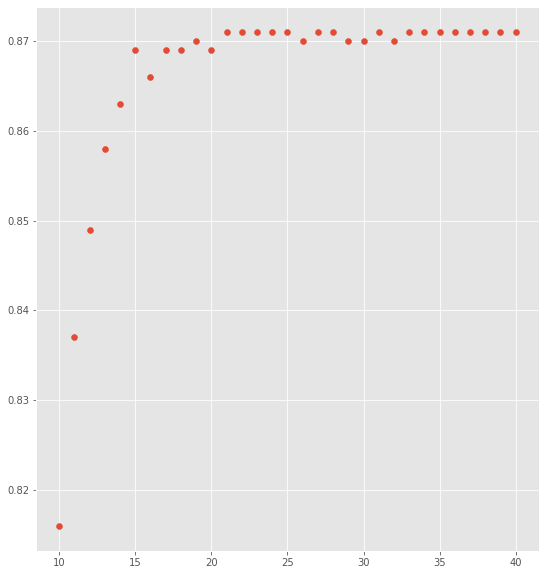

In [ ]:
accuracy_list = []
depth_list = list(np.arange(10,41))
for depth in depth_list:
    rf = RandomForestClassifier(n_estimators=100, 
                                max_depth=depth,
                                max_features='auto', 
                                min_samples_leaf=25,
                                bootstrap=True, 
                                n_jobs=-1, 
                                random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_list.append(round(accuracy_score(y_test,y_pred),3))

npp = np.array(accuracy_list)
npp.max()
for i in range(len(accuracy_list)):
    if(al[i] == npp.max()):
        print('max_depth :',depth_list[i], '       |     accuracy :',npp.max())
        break

plt.figure(figsize = (9,10))
plt.scatter(depth_list,accuracy_list)
plt.show();

max_depth : 19        |     accuracy : 0.871


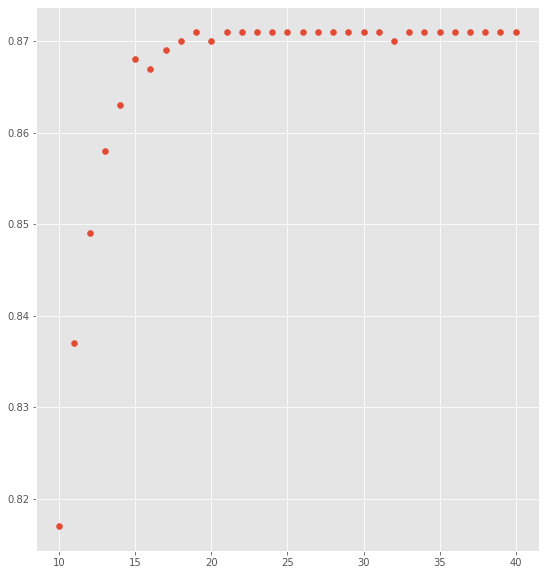

In [ ]:
accuracy_list = []
depth_list = list(np.arange(10,41))
for depth in depth_list:
    rf = RandomForestClassifier(n_estimators=125, 
                                max_depth=depth,
                                max_features='auto', 
                                min_samples_leaf=25,
                                bootstrap=True, 
                                n_jobs=-1, 
                                random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_list.append(round(accuracy_score(y_test,y_pred),3))

npp = np.array(accuracy_list)
npp.max()
for i in range(len(accuracy_list)):
    if(al[i] == npp.max()):
        print('max_depth :',depth_list[i], '       |     accuracy :',npp.max())
        break

plt.figure(figsize = (9,10))
plt.scatter(depth_list,accuracy_list)
plt.show();

### n_estimators = 150

max_depth : 21        |     accuracy : 0.872


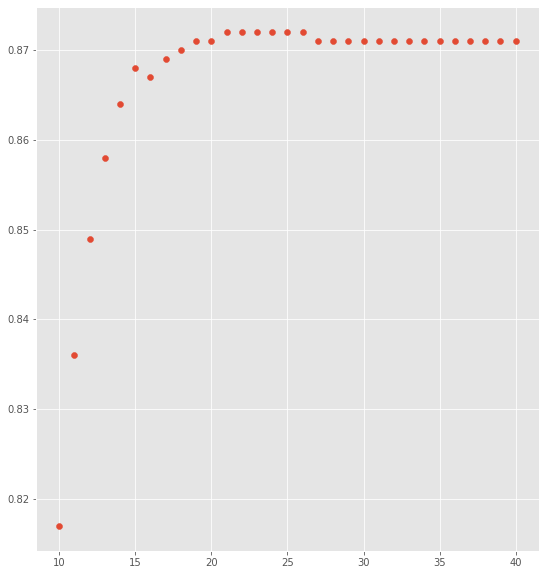

In [ ]:
accuracy_list = []
depth_list = list(np.arange(10,41))
for depth in depth_list:
    rf = RandomForestClassifier(n_estimators=150, 
                                max_depth=depth,
                                max_features='auto', 
                                min_samples_leaf=25,
                                bootstrap=True, 
                                n_jobs=-1, 
                                random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_list.append(round(accuracy_score(y_test,y_pred),3))

npp = np.array(accuracy_list)
npp.max()
for i in range(len(accuracy_list)):
    if(al[i] == npp.max()):
        print('max_depth :',depth_list[i], '       |     accuracy :',npp.max())
        break

plt.figure(figsize = (9,10))
plt.scatter(depth_list,accuracy_list)
plt.show();





max_depth : 21        |     accuracy : 0.872


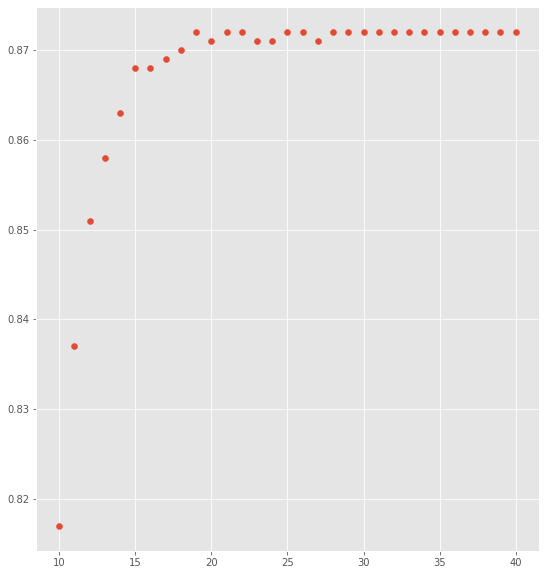

In [ ]:
accuracy_list = []
depth_list = list(np.arange(10,41))
for depth in depth_list:
    rf = RandomForestClassifier(n_estimators=180, 
                                max_depth=depth,
                                max_features='auto', 
                                min_samples_leaf=25,
                                bootstrap=True, 
                                n_jobs=-1, 
                                random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_list.append(round(accuracy_score(y_test,y_pred),3))

npp = np.array(accuracy_list)
npp.max()
for i in range(len(accuracy_list)):
    if(al[i] == npp.max()):
        print('max_depth :',depth_list[i], '       |     accuracy :',npp.max())
        break

plt.figure(figsize = (9,10))
plt.scatter(depth_list,accuracy_list)
plt.show();

max_depth : 21        |     accuracy : 0.872


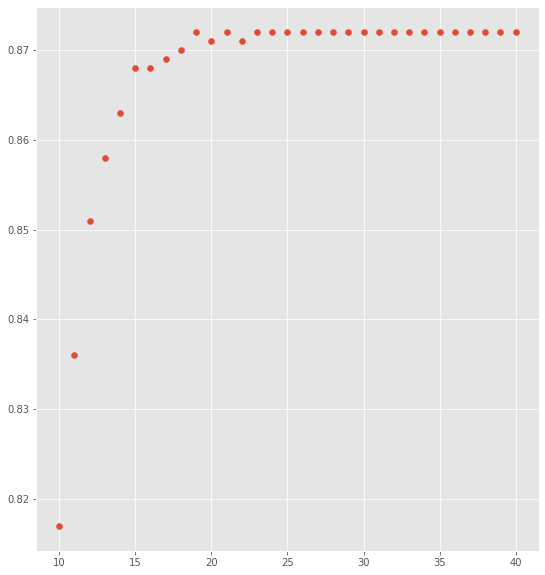

In [ ]:
accuracy_list = []
depth_list = list(np.arange(10,41))
for depth in depth_list:
    rf = RandomForestClassifier(n_estimators=200, 
                                max_depth=depth,
                                max_features='auto', 
                                min_samples_leaf=25,
                                bootstrap=True, 
                                n_jobs=-1, 
                                random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_list.append(round(accuracy_score(y_test,y_pred),3))

npp = np.array(accuracy_list)
npp.max()
for i in range(len(accuracy_list)):
    if(al[i] == npp.max()):
        print('max_depth :',depth_list[i], '       |     accuracy :',npp.max())
        break

plt.figure(figsize = (9,10))
plt.scatter(depth_list,accuracy_list)
plt.show();

In [ ]:
rf = RandomForestClassifier(n_estimators=150, 
                            max_depth= 21,
                            max_features='auto', 
                            min_samples_leaf=25,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

ValueError: ignored

In [ ]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 210 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=d67e1fa4e71213ccbc1ab01d021a7591ec99b163417fd3b040f6e067a63e3621
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


In [ ]:
df.sample()

,book,wl,n,k,wl_binned
246716,propanol,2.16551,1.35709,0.000159,IR


In [ ]:
rf

NameError: ignored

In [ ]:
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from sklearn import tree
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

AttributeError: ignored

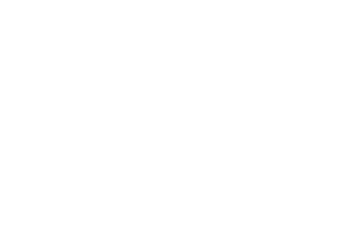

In [ ]:
from sklearn.tree import plot_tree
plot_tree(rf)

In [ ]:
df.feature_names

AttributeError: ignored

In [ ]:
rf.estimators_[0].tree_.max_depth

21

AttributeError: ignored

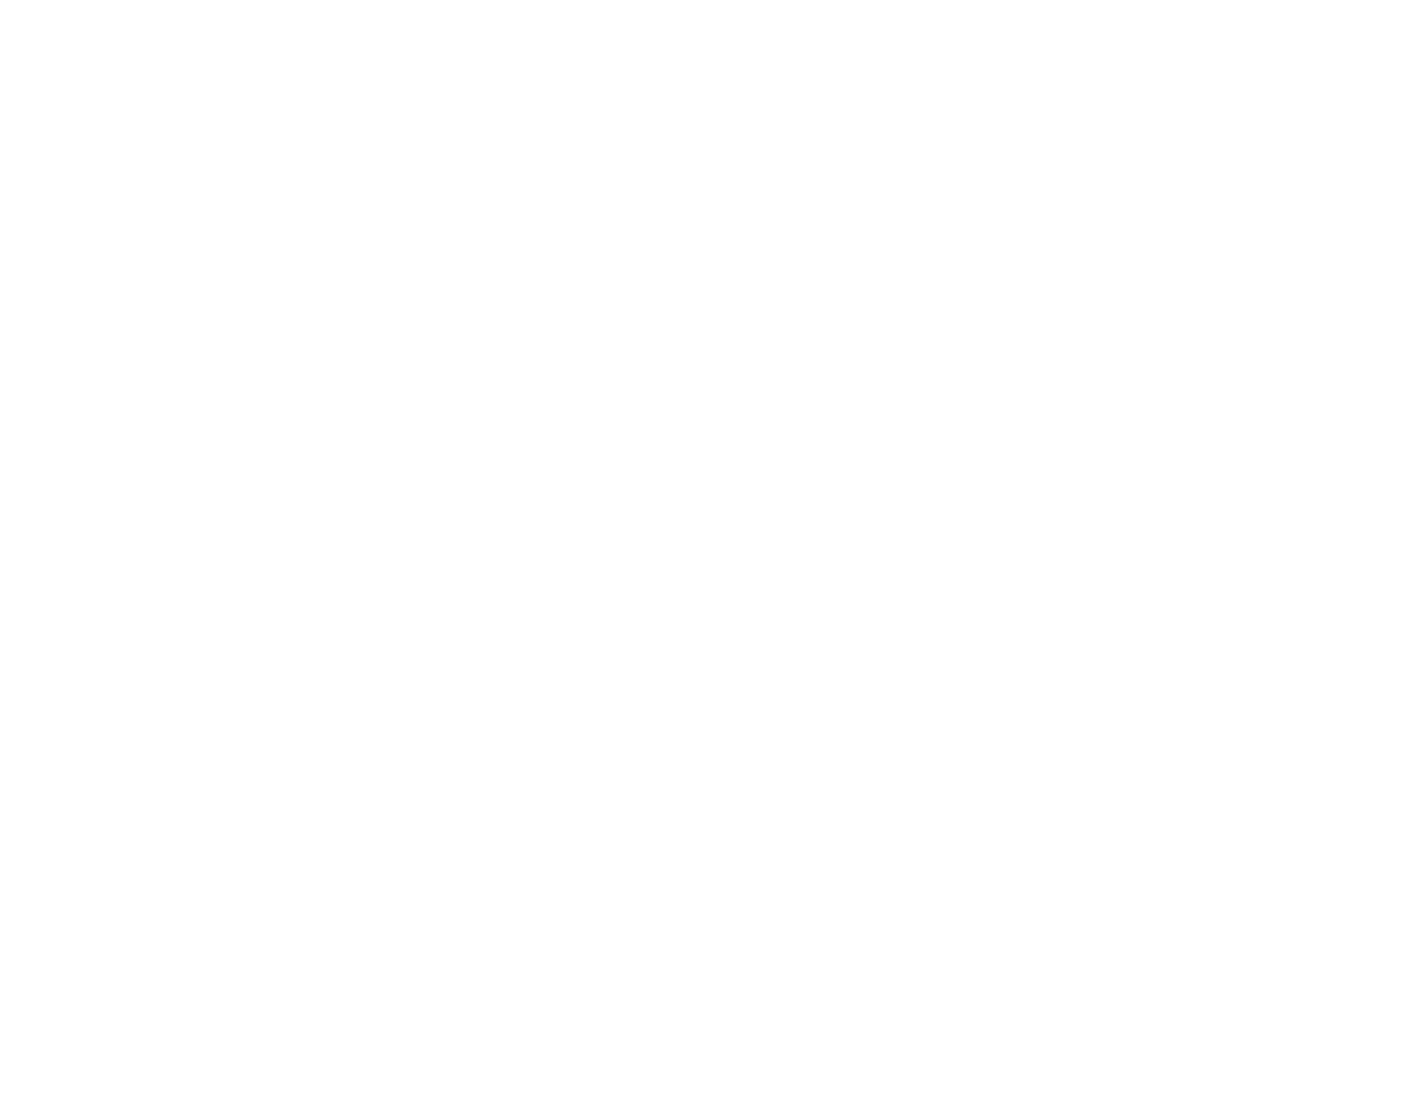

In [ ]:
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(rf, 
                   feature_names = [["wl", "n", "k"]],
                   class_names = "book",
                   filled = True)

In [ ]:
viz = dtreeviz(rf, x_train, y_train, target_name = "book", 
                   feature_names = [["wl", "n", "k"]])

ValueError: ignored

In [ ]:
n_nodes = rf.estimators_[0].tree_.node_count
n_nodes

4137

In [ ]:
## New method
import PIL
import pydotplus
import warnings
from glob import glob
from IPython.display import display, Image
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [ ]:
def save_decision_trees_as_png(clf, iteration, feature_name, target_name):
    file_name = "iris_" + str(iteration) + ".png"
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print("Decision Tree {} saved as png file".format(iteration + 1))

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
                        random_state=787846414),
 DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
                        random_state=996406378),
 DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
                        random_state=423734972),
 DecisionTreeClassifier(max_depth=21, max_features='auto', min_samples_leaf=25,
             

In [ ]:
len(rf.estimators_)

150

In [ ]:
for i in range(len(rf.estimators_)):
    save_decision_trees_as_png(rf.estimators_[i], i, ['wl', 'n','k'], ["book"])

IndexError: ignored

AttributeError: ignored

In [ ]:
rf_model_wout_bin.estimators_[0].tree_.max_depth

AttributeError: ignored

In [ ]:
rf_model_wout_bin.tree_.max_depth

AttributeError: ignored

In [ ]:
rf_model_wout_bin.tree.max_depth

AttributeError: ignored

In [ ]:
rf_model_wout_bin

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['wl', 'n', 'k'])])),
                ('regressor', RandomForestClassifier())])

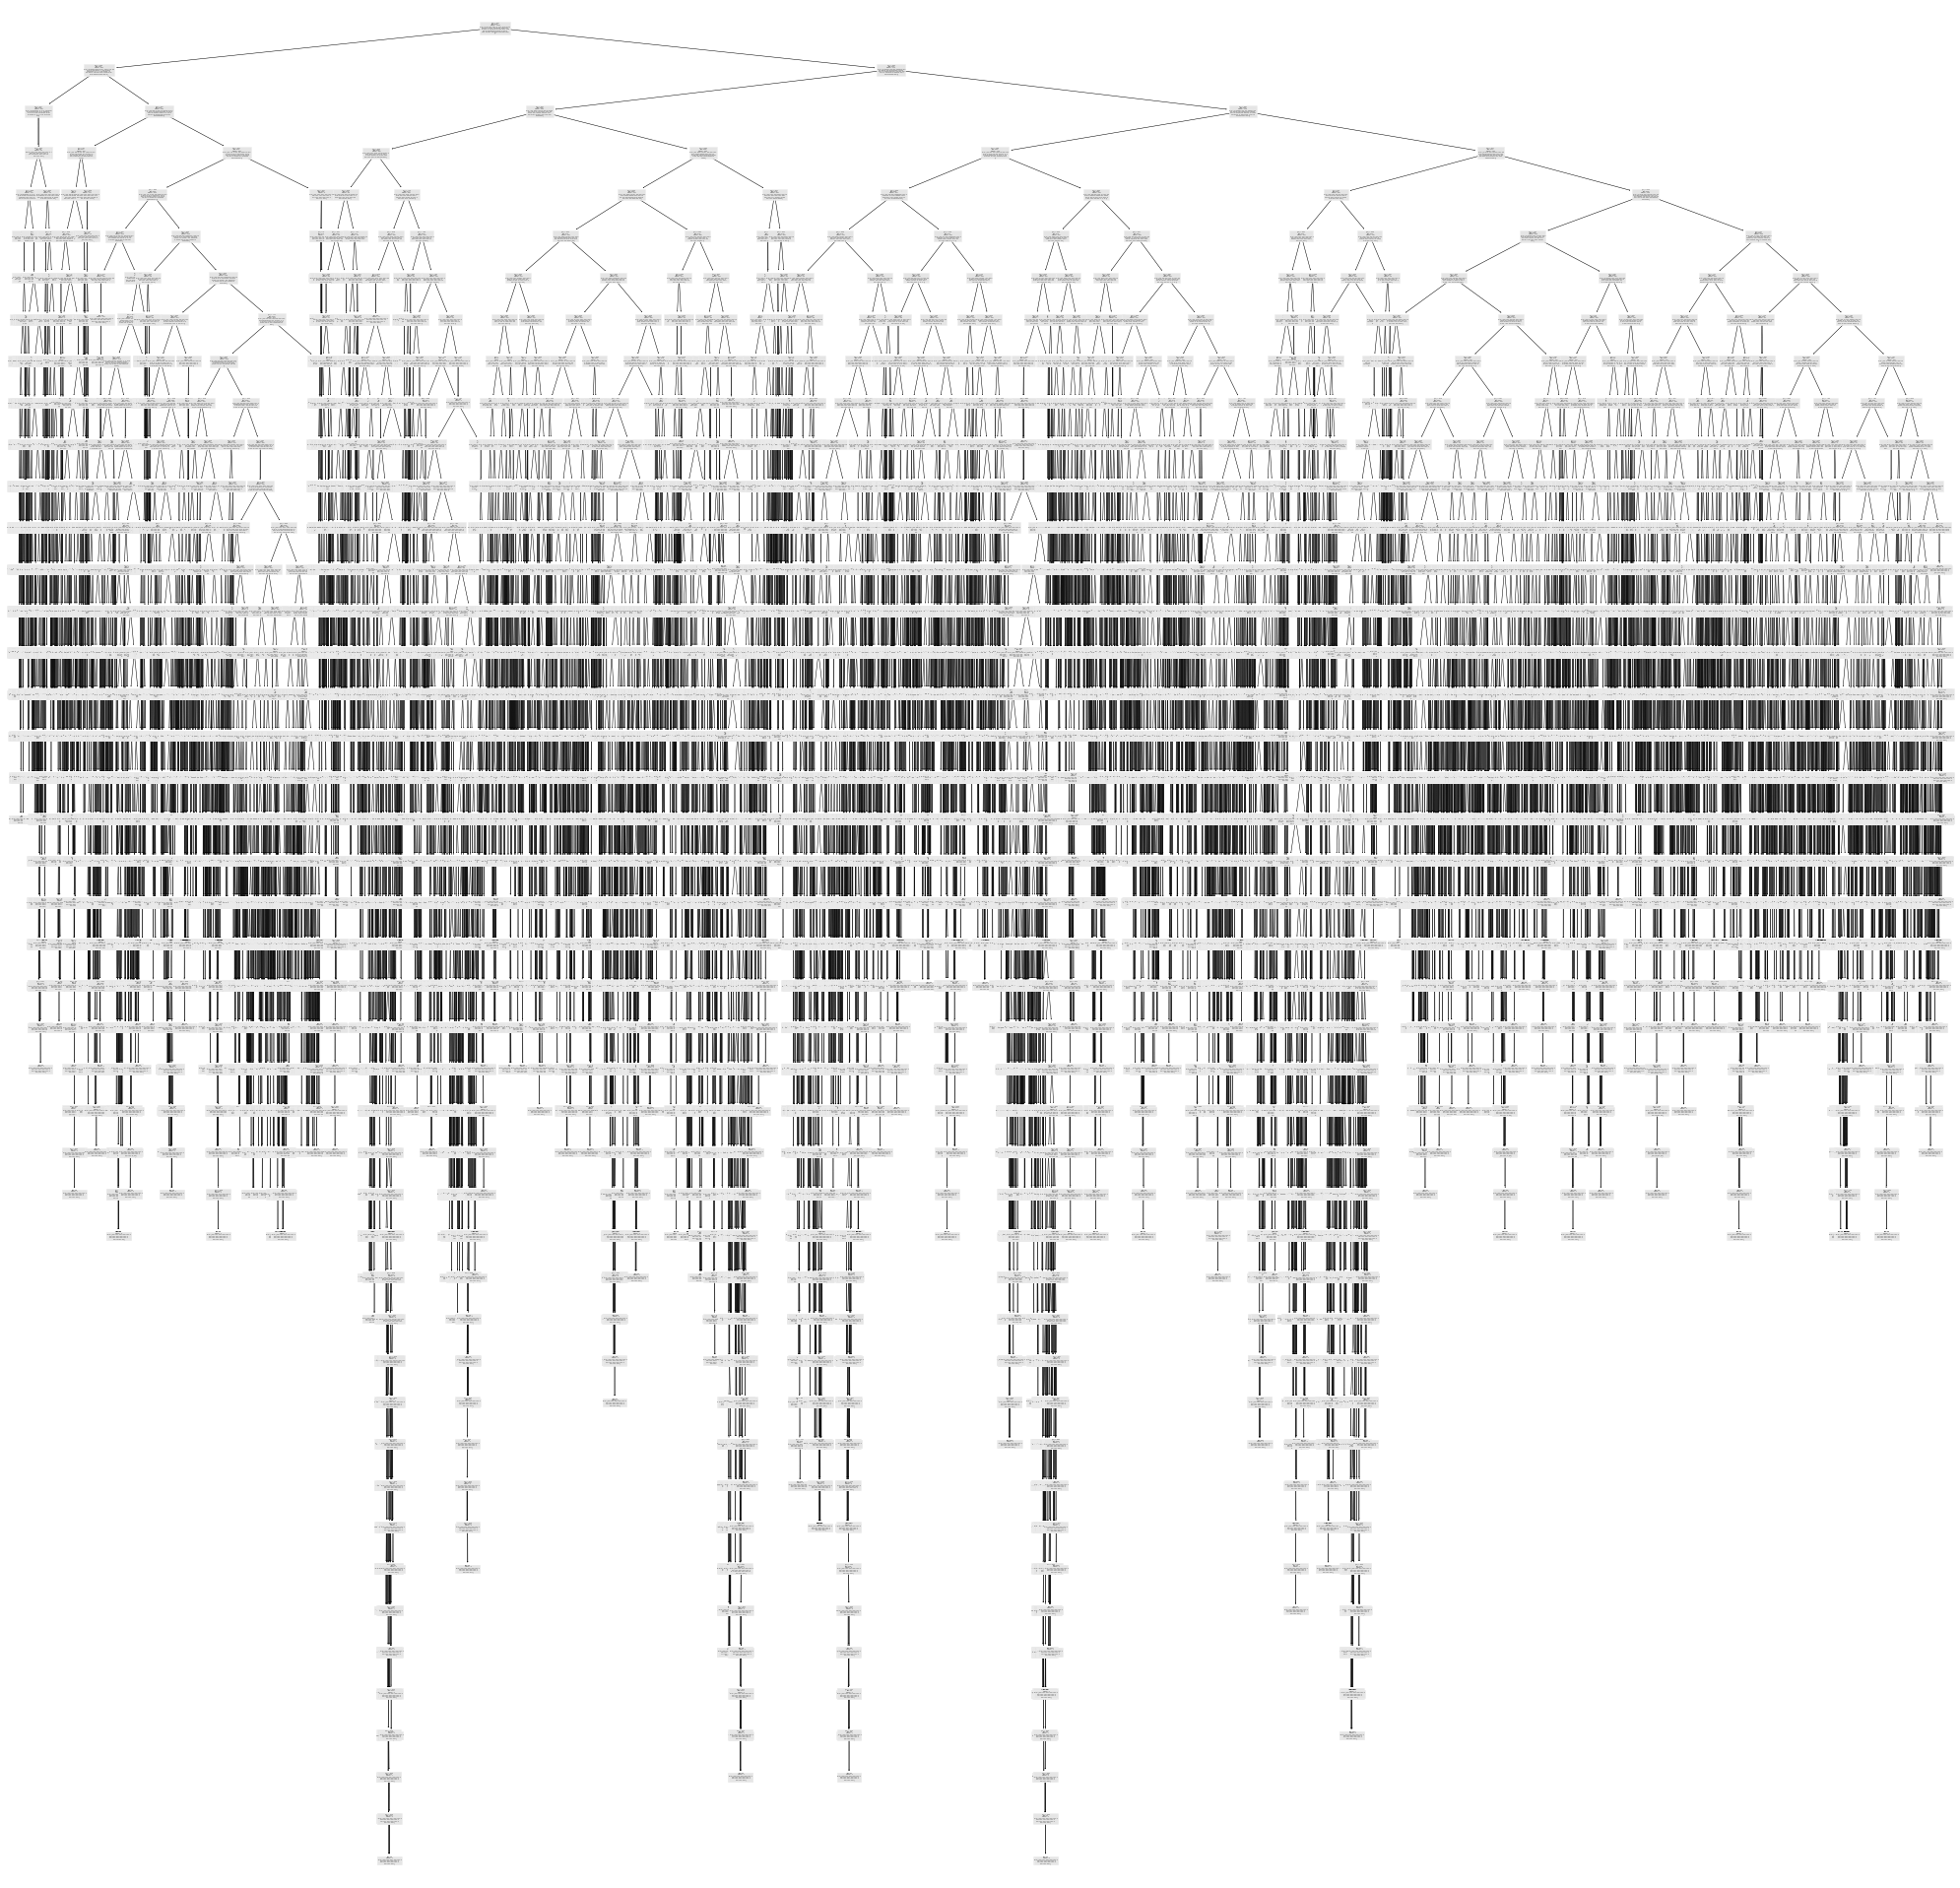

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(35,35))
models = rf_model_wout_bin[1]
plot_tree(models.estimators_[0])
plt.savefig('estimator0.png')
plt.show()


In [ ]:
from sklearn.tree import plot_tree
models = rf_model_wout_bin[1]
for i in range(len(models.estimators_)):
    plot_tree(models.estimators_[i])
    plt.show()
    plt.savefig('estimator' + str[i])


#from sklearn.tree import plot_tree


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f956aba38c0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f956abab3b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
|orglst = df.book.unique().tolist()

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 196 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=3a9c75ccfa8a86defc175839ba2bdf431039a0672492659a3f41c689577311d8
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


In [ ]:
x_train.columns

Index(['wl', 'n', 'k'], dtype='object')

In [ ]:
x_train.columns.tolist()

['wl', 'n', 'k']

In [ ]:
orglist = df.book.unique().tolist()
len(orglist)

61

In [ ]:

from dtreeviz.trees import dtreeviz
models = rf_model_wout_bin[1]

viz = dtreeviz(models.estimators_[0],x_train, y_train,
                target_name="book",
               feature_names = x_train.columns.tolist(),
               class_names =df.book.unique().tolist() )
print(viz)

IndexError: ignored

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
models.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1098810942)

In [ ]:
## test train data
x = df.drop(['book','wl_binned'], axis=1) # Input features (attributes)
y = df['book']   # Taget Vector

print('X shape: {}'.format(np.shape(x)))
print('Y shape: {}'.format(np.shape(y)))
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

X shape: (245286, 3)
Y shape: (245286,)
